In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.dates as mdates

In [47]:
table = pd.read_csv('/content/Final_Table.csv')

In [48]:
table.head()

,driver_id,ride_id,ride_distance (miles),ride_duration (minutes),ride_prime_time (percentage),cost w/ prime time,lyft profit,driver_onboard_date,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at,duration_request_to_accept,duration_accept_to_arrive,duration_arrived_to_pickup,duration_ride
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1.125303,5.450000,0.50,8.489648,1.347930,2016-03-29,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07,25.0,141.0,4.0,327.0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,2.089050,13.483333,0.00,9.118741,1.473748,2016-03-29,2016-03-29 19:00:49,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:04:01,2016-03-29 19:17:30,3.0,185.0,4.0,809.0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,2.039340,9.533333,0.00,8.192575,1.288515,2016-03-29,2016-06-21 11:56:31,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:01:35,2016-06-21 12:11:07,8.0,293.0,3.0,572.0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,40.564976,55.633333,0.25,77.861319,15.222264,2016-03-29,2016-05-19 09:15:29,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19 10:13:58,4.0,167.0,0.0,3338.0
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,2.556942,13.716667,1.00,17.666301,3.183260,2016-03-29,2016-04-20 22:05:30,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:07:02,2016-04-20 22:20:45,2.0,91.0,NaN,823.0


In [49]:
print(table.columns)

Index(['driver_id', 'ride_id', 'ride_distance (miles)',
       'ride_duration (minutes)', 'ride_prime_time (percentage)',
       'cost w/ prime time', 'lyft profit', 'driver_onboard_date',
       'requested_at', 'accepted_at', 'arrived_at', 'picked_up_at',
       'dropped_off_at', 'duration_request_to_accept',
       'duration_accept_to_arrive', 'duration_arrived_to_pickup',
       'duration_ride'],
      dtype='object')


In [50]:
def work_expectancy_df(df):
    df['driver_onboard_date'] = pd.to_datetime(df['driver_onboard_date'])
    df['dropped_off_at'] = pd.to_datetime(df['dropped_off_at'])
    part_one = pd.DataFrame(df.groupby('driver_id')['driver_onboard_date'].min()).reset_index()
    part_two = pd.DataFrame(df.groupby('driver_id')['dropped_off_at'].max()).reset_index()
    important_times = part_one.merge(part_two, on='driver_id')
    important_times['worktime_expectancy'] = important_times['dropped_off_at'] - important_times['driver_onboard_date']
    important_times['worktime_expectancy (days)'] = important_times['worktime_expectancy'].dt.days
    important_times = important_times[['driver_id', 'worktime_expectancy (days)']]
    return important_times
work_expectancy_data = work_expectancy_df(table)
print(work_expectancy_data.head())

                          driver_id  worktime_expectancy (days)
0  002be0ffdc997bd5c50703158b7c2491                          86
1  007f0389f9c7b03ef97098422f902e62                          85
2  011e5c5dfc5c2c92501b8b24d47509bc                          68
3  0152a2f305e71d26cc964f8d4411add9                          64
4  01674381af7edd264113d4e6ed55ecda                          56


In [51]:
summary_of_worktime = work_expectancy_df(table)
summary_of_worktime.head()

,driver_id,worktime_expectancy (days)
0,002be0ffdc997bd5c50703158b7c2491,86
1,007f0389f9c7b03ef97098422f902e62,85
2,011e5c5dfc5c2c92501b8b24d47509bc,68
3,0152a2f305e71d26cc964f8d4411add9,64
4,01674381af7edd264113d4e6ed55ecda,56


In [52]:
overall_costs = pd.DataFrame(table.groupby('driver_id')[['cost w/ prime time','lyft profit']]
                             .sum()).reset_index()

In [53]:
summary = summary_of_worktime.merge(overall_costs)
summary.head()

,driver_id,worktime_expectancy (days),cost w/ prime time,lyft profit
0,002be0ffdc997bd5c50703158b7c2491,86,3560.922468,615.234494
1,007f0389f9c7b03ef97098422f902e62,85,321.494698,53.448940
2,011e5c5dfc5c2c92501b8b24d47509bc,68,482.427855,84.585571
3,0152a2f305e71d26cc964f8d4411add9,64,2610.868733,455.323747
4,01674381af7edd264113d4e6ed55ecda,56,5381.091520,944.968304


In [54]:
number_of_drives = table.groupby('driver_id')[['ride_id']].count().reset_index()
summary_extended = summary.merge(number_of_drives)
def group_decider(x):
    if x < 100:
        return 0
    else:
        return 1
summary_extended['group'] = summary_extended['ride_id'].apply(group_decider)
summary_extended.columns = ['driver_id','worktime_expectancy (days)','cost w/ prime time', 'lyft profit', 'number drives', 'group']
summary_extended.head()

,driver_id,worktime_expectancy (days),cost w/ prime time,lyft profit,number drives,group
0,002be0ffdc997bd5c50703158b7c2491,86,3560.922468,615.234494,277,1
1,007f0389f9c7b03ef97098422f902e62,85,321.494698,53.448940,31,0
2,011e5c5dfc5c2c92501b8b24d47509bc,68,482.427855,84.585571,34,0
3,0152a2f305e71d26cc964f8d4411add9,64,2610.868733,455.323747,191,1
4,01674381af7edd264113d4e6ed55ecda,56,5381.091520,944.968304,375,1


In [55]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=summary_extended['worktime_expectancy (days)'],
    name='Lifetime',
    boxmean=True,
))
fig.update_layout(
    title='Boxplot of Lifetime',
    yaxis_title='Lifetime (Days)',
    width=800,
    height=500,
    hovermode='closest'
)
fig.show()

In [56]:
n, x = np.histogram(summary_extended['worktime_expectancy (days)'], bins=np.linspace(0, 100, 20), density=True)
density = stats.gaussian_kde(summary_extended['worktime_expectancy (days)'])
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=summary_extended['worktime_expectancy (days)'],
    histnorm='probability density',
    name='Histogram',
    opacity=0.6,
    marker=dict(color='royalblue', line=dict(color='black', width=1)),
    nbinsx=20
))
fig.add_trace(go.Scatter(
    x=x[:-1],
    y=density(x),
    mode='lines',
    name='Density',
    line=dict(color='firebrick', width=3),
))
fig.update_layout(
    title='Density Histogram of Lifetime',
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    xaxis_title='Lifetime (Days)',
    yaxis_title='Density',
    xaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='lightgray'
    ),
    legend=dict(
        font=dict(size=14),
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    width=900,
    height=500,
    plot_bgcolor='white',
)
fig.show()

In [57]:
table['requested_at'] = pd.to_datetime(table['requested_at'])
table['dropped_off_at'] = pd.to_datetime(table['dropped_off_at'])

# Define churn threshold as 4 weeks before the last date in the dataset
churn_threshold_date = table['requested_at'].max() - pd.Timedelta(weeks=4)

# Determine each driver's last ride date
driver_last_ride = table.groupby('driver_id')['requested_at'].max().reset_index()

# Mark drivers as churned if their last ride was before the churn threshold date
driver_last_ride['is_churned'] = np.where(driver_last_ride['requested_at'] < churn_threshold_date, 1, 0)

# Calculate churn rate
total_drivers = len(driver_last_ride)
churned_drivers = driver_last_ride['is_churned'].sum()
churn_rate = churned_drivers / total_drivers

print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 18.28%


In [58]:
table['requested_at'] = pd.to_datetime(table['requested_at'])
table['dropped_off_at'] = pd.to_datetime(table['dropped_off_at'])
table['lyft_revenue'] = table['lyft profit']
driver_stats = table.groupby('driver_id').agg({
    'lyft_revenue': 'sum',
    'requested_at': 'min',
    'dropped_off_at': 'max'
})
driver_stats['active_days'] = (driver_stats['dropped_off_at'] - driver_stats['requested_at']).dt.days + 1
driver_stats['avg_daily_lyft_revenue'] = driver_stats['lyft_revenue'] / driver_stats['active_days']
annual_lyft_revenue_per_driver = driver_stats['avg_daily_lyft_revenue'].mean() * 365
average_tenure_days = 57
average_tenure_years = average_tenure_days / 365
churn_rate = 0.1828
discount_rate = 0.10
ltv = (annual_lyft_revenue_per_driver * (1 - churn_rate) ** average_tenure_years) / (1 + discount_rate) ** average_tenure_years
print(f"Estimated Driver LTV for Lyft over {average_tenure_days} days, adjusted for churn and discount: ${ltv:.2f}")

Estimated Driver LTV for Lyft over 57 days, adjusted for churn and discount: $3190.21


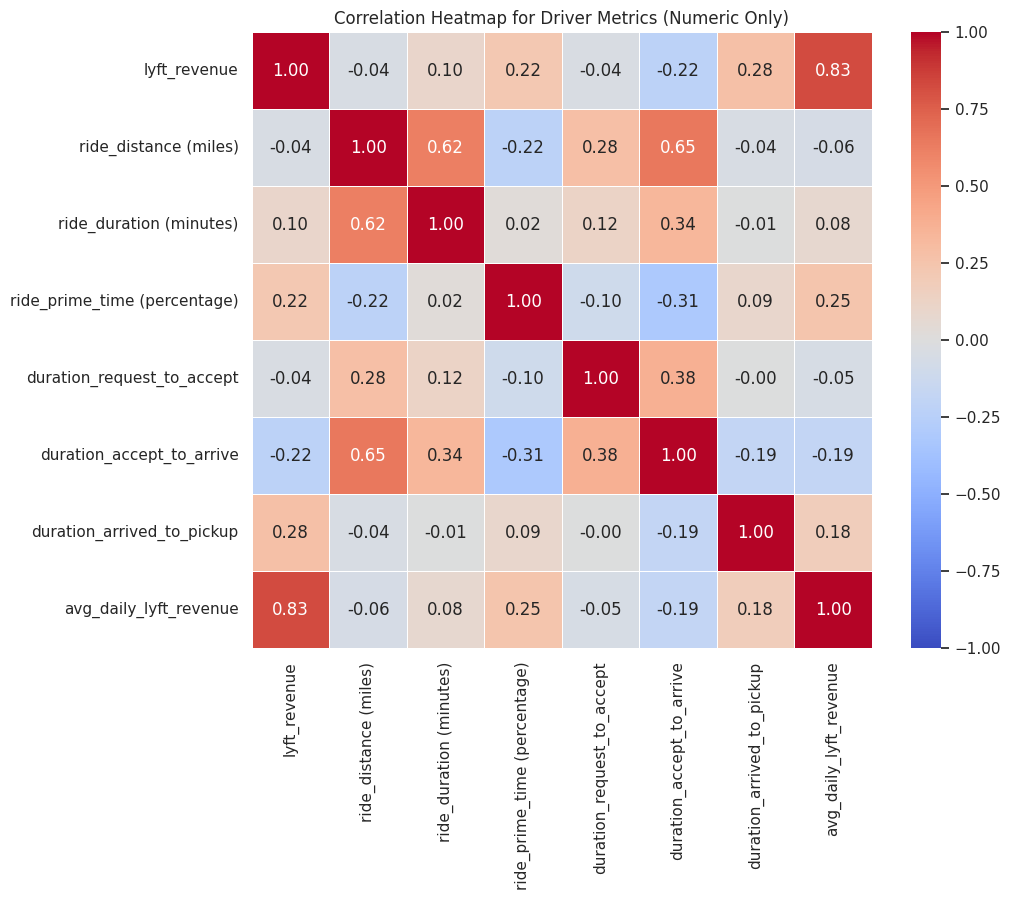

In [59]:
table['requested_at'] = pd.to_datetime(table['requested_at'])
table['dropped_off_at'] = pd.to_datetime(table['dropped_off_at'])
table['lyft_revenue'] = table['lyft profit']
driver_metrics = table.groupby('driver_id').agg({
    'lyft_revenue': 'sum',
    'ride_distance (miles)': 'mean',
    'ride_duration (minutes)': 'mean',
    'ride_prime_time (percentage)': 'mean',
    'duration_request_to_accept': 'mean',
    'duration_accept_to_arrive': 'mean',
    'duration_arrived_to_pickup': 'mean'
}).reset_index()
driver_stats = table.groupby('driver_id').agg({
    'requested_at': 'min',
    'dropped_off_at': 'max'
})
driver_stats['active_days'] = (driver_stats['dropped_off_at'] - driver_stats['requested_at']).dt.days + 1
driver_metrics['avg_daily_lyft_revenue'] = driver_metrics['lyft_revenue'] / driver_stats['active_days'].values
numeric_columns = driver_metrics.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Driver Metrics (Numeric Only)")
plt.show()

In [60]:
table['requested_at'] = pd.to_datetime(table['requested_at'])
table['dropped_off_at'] = pd.to_datetime(table['dropped_off_at'])
table['lyft_revenue'] = table['lyft profit']
driver_metrics = table.groupby('driver_id').agg({
    'lyft_revenue': 'sum',
    'ride_distance (miles)': 'mean',
    'ride_duration (minutes)': 'mean',
    'ride_prime_time (percentage)': 'mean',
    'duration_request_to_accept': 'mean',
    'duration_accept_to_arrive': 'mean',
    'duration_arrived_to_pickup': 'mean'
}).reset_index()
driver_stats = table.groupby('driver_id').agg({
    'requested_at': 'min',
    'dropped_off_at': 'max'
})
driver_stats['active_days'] = (driver_stats['dropped_off_at'] - driver_stats['requested_at']).dt.days + 1
driver_metrics['avg_daily_lyft_revenue'] = driver_metrics['lyft_revenue'] / driver_stats['active_days'].values
numeric_columns = driver_metrics.select_dtypes(include=[np.number])
correlations = numeric_columns.corr()['avg_daily_lyft_revenue'].sort_values(ascending=False)
print("\nCorrelation of Factors with Average Daily Lyft Revenue (LTV Proxy):")
print(correlations)
print("\nKey Factors Affecting Driver's Lifetime Value:")
for factor, corr in correlations.items():
    if factor != 'avg_daily_lyft_revenue' and abs(corr) > 0.1:
        print(f"- {factor}: Correlation of {corr:.2f}")


Correlation of Factors with Average Daily Lyft Revenue (LTV Proxy):
avg_daily_lyft_revenue          1.000000
lyft_revenue                    0.825505
ride_prime_time (percentage)    0.247336
duration_arrived_to_pickup      0.178439
ride_duration (minutes)         0.077937
duration_request_to_accept     -0.054630
ride_distance (miles)          -0.060321
duration_accept_to_arrive      -0.186248
Name: avg_daily_lyft_revenue, dtype: float64

Key Factors Affecting Driver's Lifetime Value:
- lyft_revenue: Correlation of 0.83
- ride_prime_time (percentage): Correlation of 0.25
- duration_arrived_to_pickup: Correlation of 0.18
- duration_accept_to_arrive: Correlation of -0.19


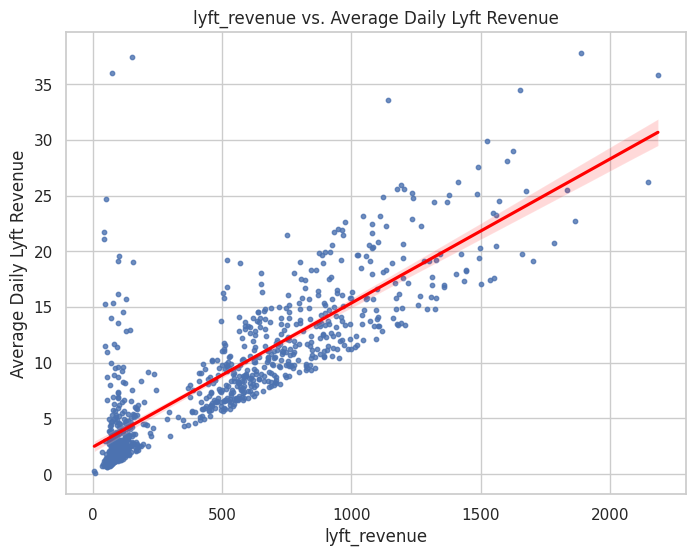

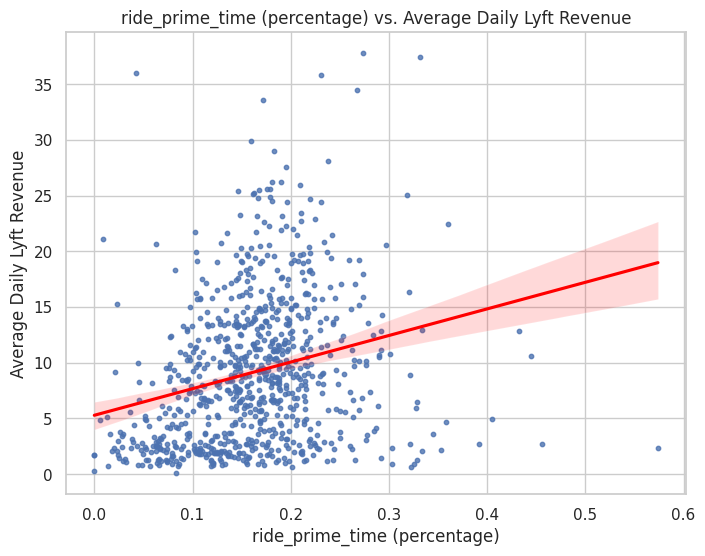

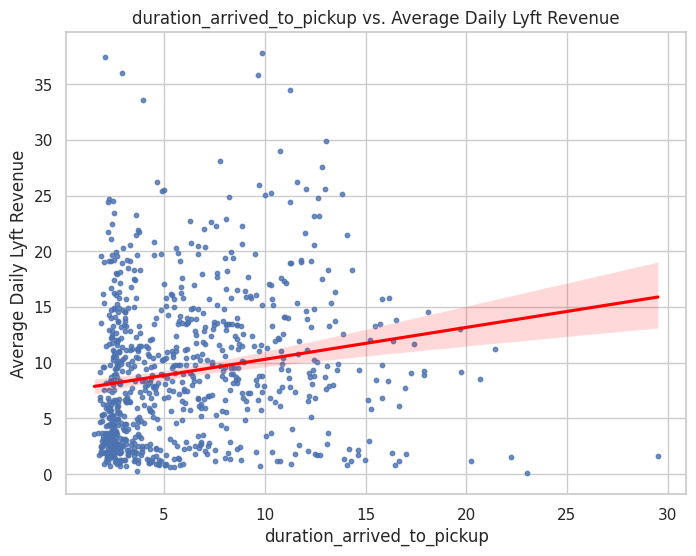

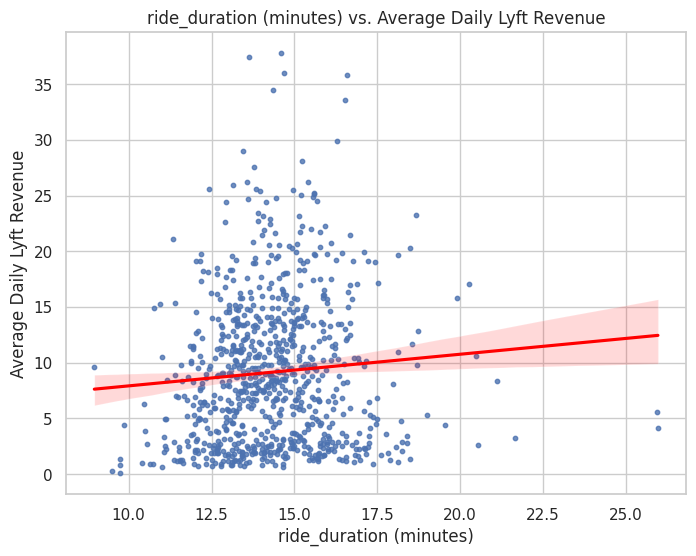

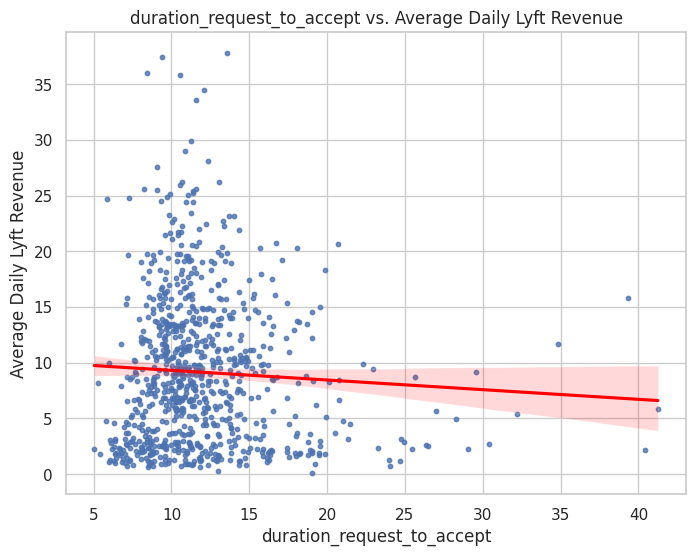

In [61]:
key_factors = correlations[correlations.index != 'avg_daily_lyft_revenue'].index[:5]  # Take top 5 factors
for factor in key_factors:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=driver_metrics, x=factor, y='avg_daily_lyft_revenue', scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title(f"{factor} vs. Average Daily Lyft Revenue")
    plt.xlabel(factor)
    plt.ylabel("Average Daily Lyft Revenue")
    plt.show()

<Figure size 1400x700 with 0 Axes>

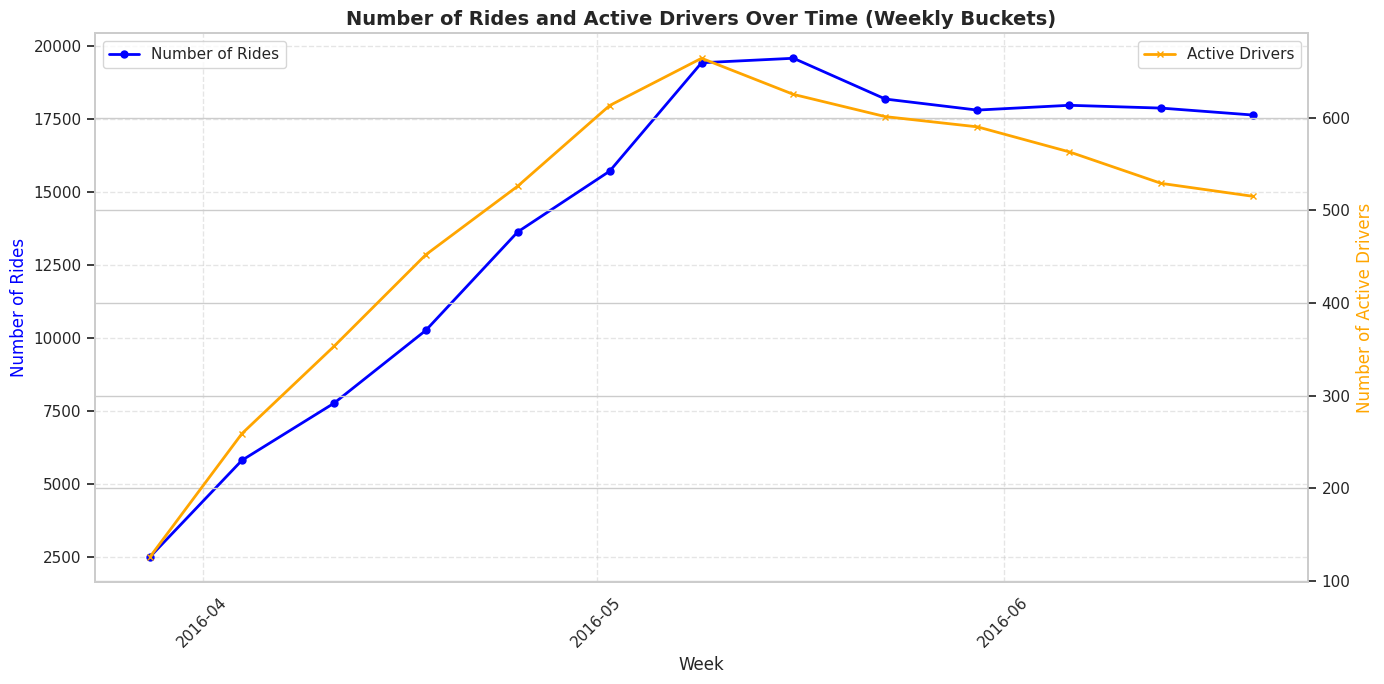

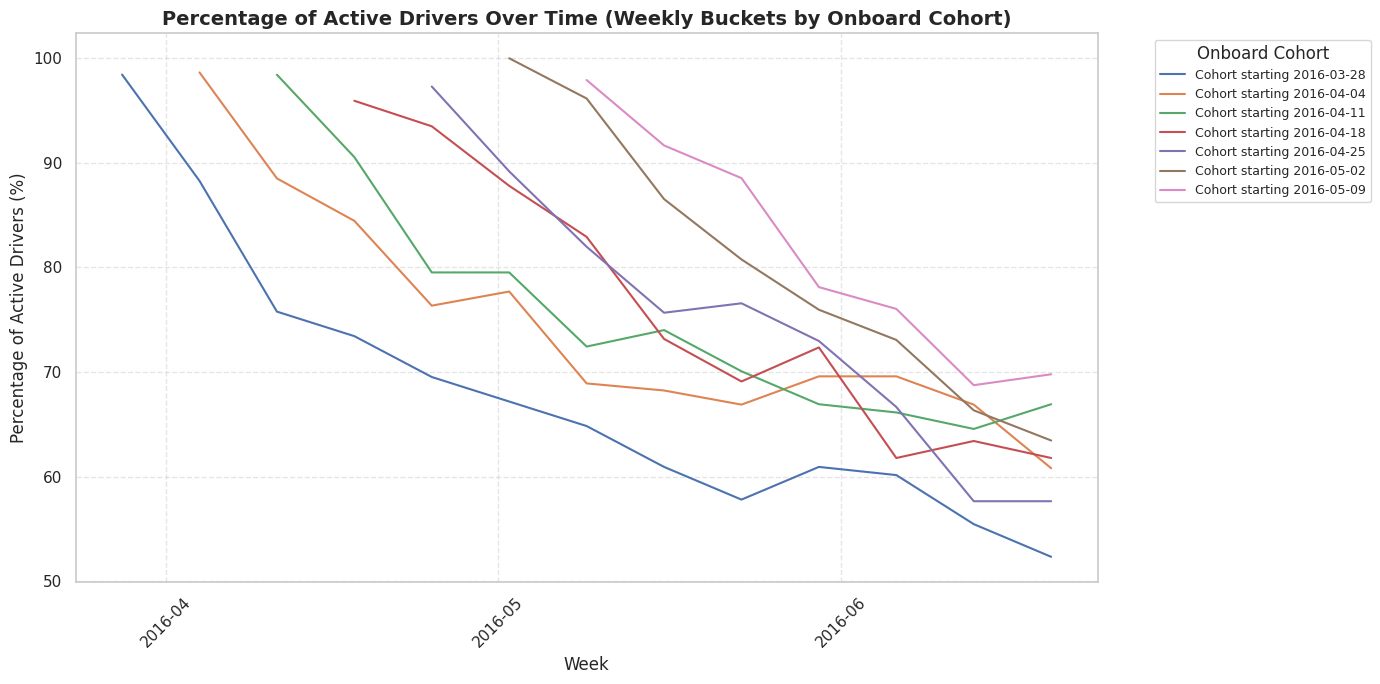

In [62]:
table['driver_onboard_date'] = pd.to_datetime(table['driver_onboard_date'])
table['requested_at'] = pd.to_datetime(table['requested_at'])
table['requested_week'] = table['requested_at'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_rides_drivers = table.groupby('requested_week').agg(
    num_rides=('ride_id', 'count'),
    active_drivers=('driver_id', 'nunique')
).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()
ax1.plot(weekly_rides_drivers['requested_week'], weekly_rides_drivers['num_rides'],
         label='Number of Rides', color='blue', linestyle='-', marker='o', markersize=5, linewidth=2)
ax2.plot(weekly_rides_drivers['requested_week'], weekly_rides_drivers['active_drivers'],
         label='Active Drivers', color='orange', linestyle='-', marker='x', markersize=5, linewidth=2)
ax1.set_xlabel("Week", fontsize=12)
ax1.set_ylabel("Number of Rides", fontsize=12, color='blue')
ax2.set_ylabel("Number of Active Drivers", fontsize=12, color='orange')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("Number of Rides and Active Drivers Over Time (Weekly Buckets)", fontsize=14, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()
table['onboard_week'] = table['driver_onboard_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_active_drivers = table.groupby(['requested_week', 'onboard_week'])['driver_id'].nunique().reset_index()
total_drivers_by_cohort = table.groupby('onboard_week')['driver_id'].nunique().rename('total_drivers').reset_index()
weekly_active_drivers = weekly_active_drivers.merge(total_drivers_by_cohort, on='onboard_week')
weekly_active_drivers['pct_active_drivers'] = (weekly_active_drivers['driver_id'] / weekly_active_drivers['total_drivers']) * 100
plt.figure(figsize=(14, 7))
for cohort, data in weekly_active_drivers.groupby('onboard_week'):
    plt.plot(data['requested_week'], data['pct_active_drivers'], label=f'Cohort starting {cohort.strftime("%Y-%m-%d")}', linewidth=1.5)

plt.xlabel("Week", fontsize=12)
plt.ylabel("Percentage of Active Drivers (%)", fontsize=12)
plt.title("Percentage of Active Drivers Over Time (Weekly Buckets by Onboard Cohort)", fontsize=14, fontweight='bold')
plt.legend(title="Onboard Cohort", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

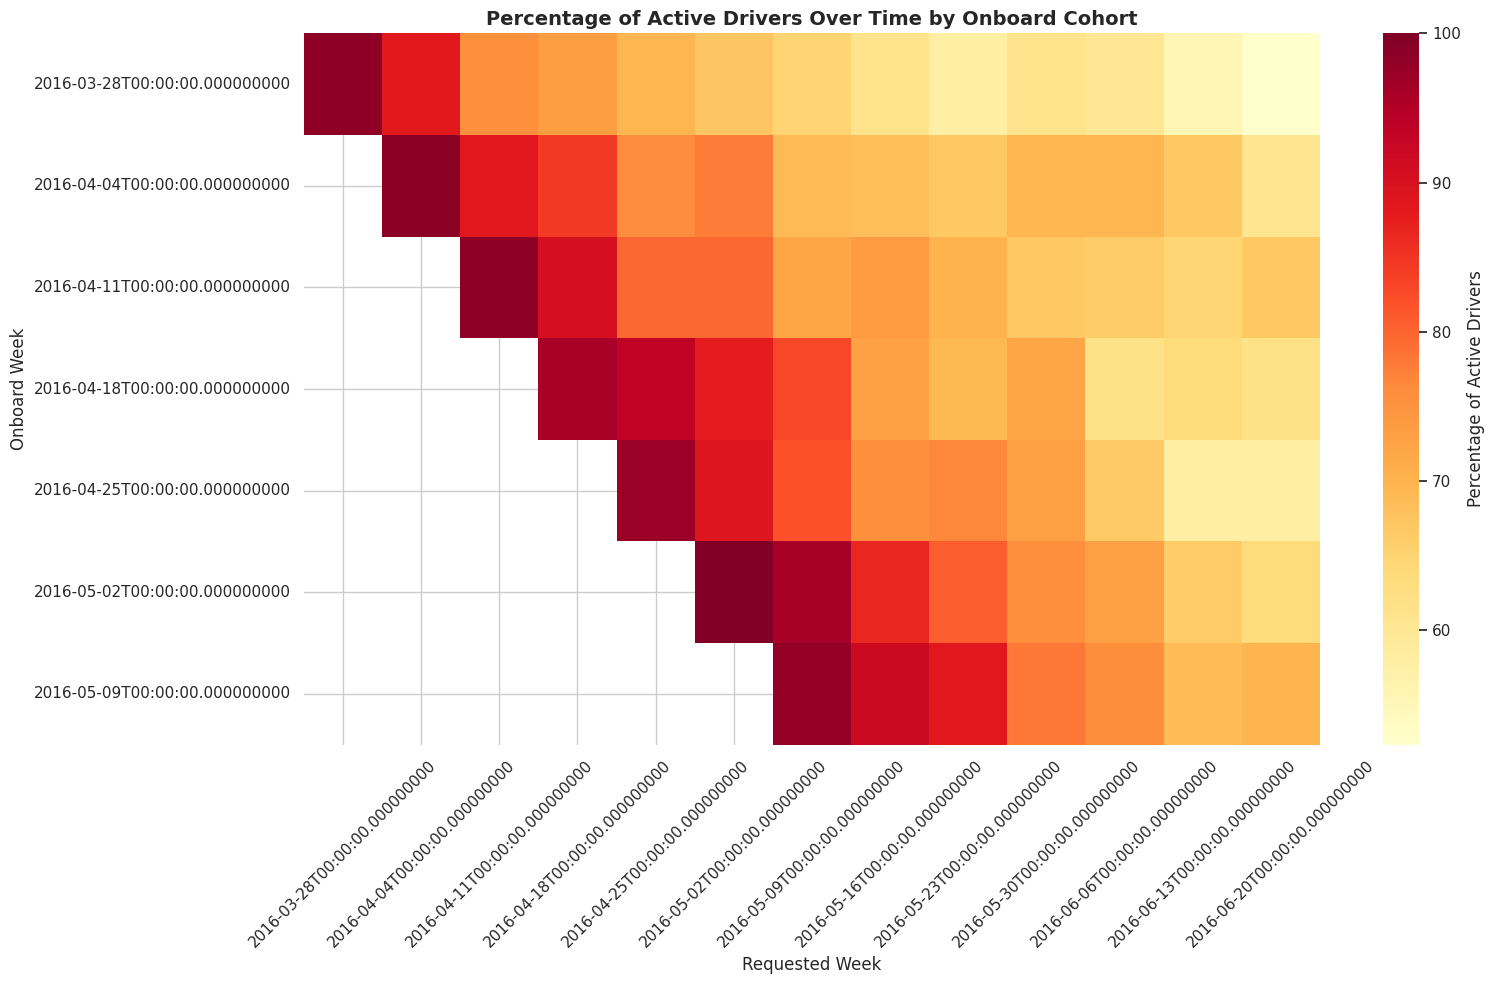

In [63]:
pivot_data = weekly_active_drivers.pivot(index='onboard_week', columns='requested_week', values='pct_active_drivers')
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=False, fmt='.0f', cbar_kws={'label': 'Percentage of Active Drivers'})
plt.title('Percentage of Active Drivers Over Time by Onboard Cohort', fontsize=14, fontweight='bold')
plt.xlabel('Requested Week', fontsize=12)
plt.ylabel('Onboard Week', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

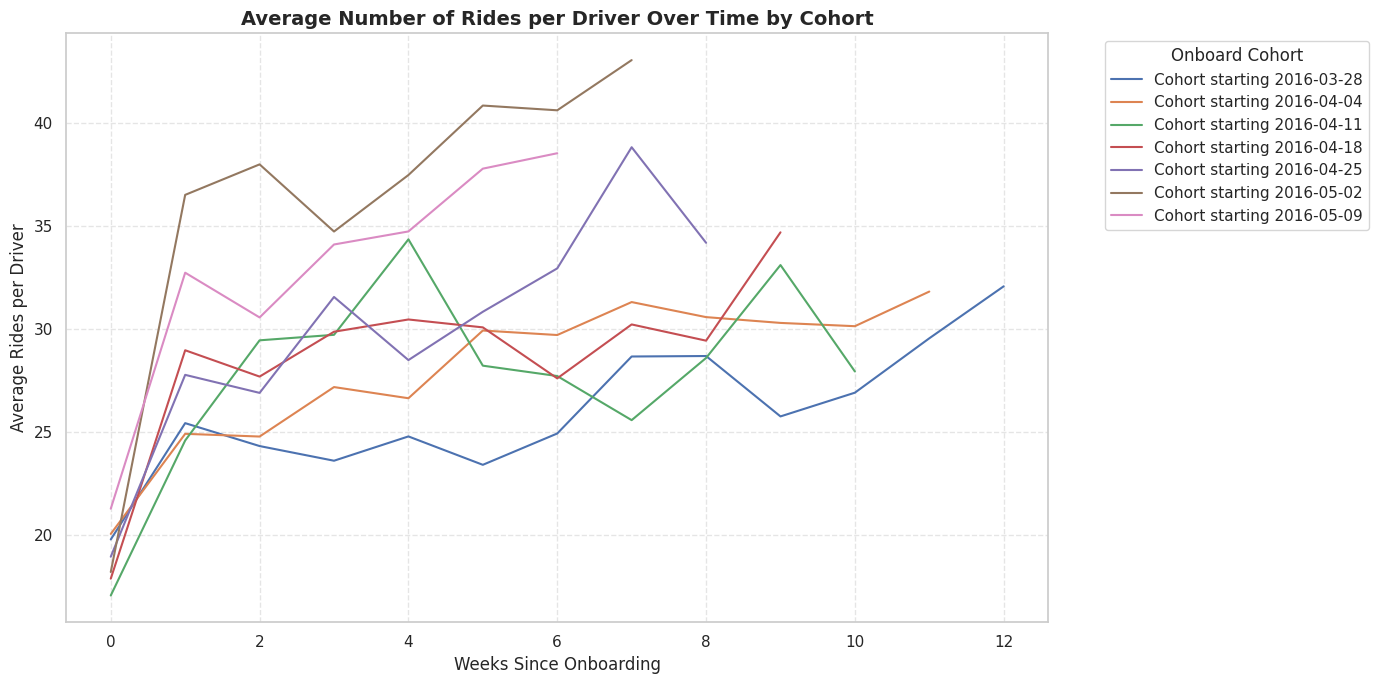

In [64]:
table['requested_week'] = table['requested_at'].dt.to_period('W').apply(lambda r: r.start_time)
table['weeks_since_onboarding'] = (table['requested_week'] - table['driver_onboard_date'].dt.to_period('W').apply(lambda r: r.start_time)).dt.days // 7
weekly_rides = table.groupby(['weeks_since_onboarding', 'onboard_week'])['ride_id'].count().reset_index()
total_drivers_per_week = table.groupby(['weeks_since_onboarding', 'onboard_week'])['driver_id'].nunique().reset_index()
weekly_rides = weekly_rides.merge(total_drivers_per_week, on=['weeks_since_onboarding', 'onboard_week'])
weekly_rides['avg_rides_per_driver'] = weekly_rides['ride_id'] / weekly_rides['driver_id']

plt.figure(figsize=(14, 7))
for cohort, data in weekly_rides.groupby('onboard_week'):
    plt.plot(data['weeks_since_onboarding'], data['avg_rides_per_driver'], label=f'Cohort starting {cohort.strftime("%Y-%m-%d")}', linewidth=1.5)

plt.xlabel("Weeks Since Onboarding", fontsize=12)
plt.ylabel("Average Rides per Driver", fontsize=12)
plt.title("Average Number of Rides per Driver Over Time by Cohort", fontsize=14, fontweight='bold')
plt.legend(title="Onboard Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

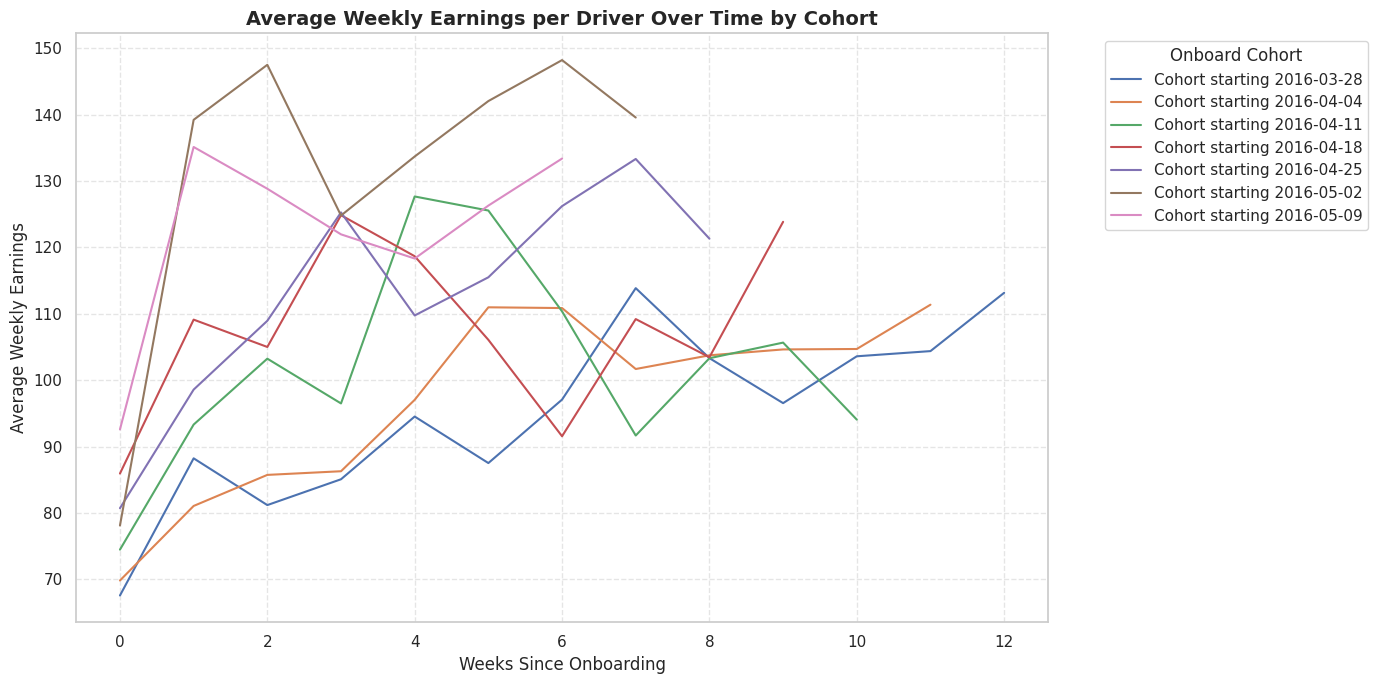

In [65]:
table['weekly_earnings'] = table.groupby(['driver_id', 'requested_week'])['lyft_revenue'].transform('sum')
weekly_earnings = table.groupby(['weeks_since_onboarding', 'onboard_week'])['weekly_earnings'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
for cohort, data in weekly_earnings.groupby('onboard_week'):
    plt.plot(data['weeks_since_onboarding'], data['weekly_earnings'], label=f'Cohort starting {cohort.strftime("%Y-%m-%d")}', linewidth=1.5)

plt.xlabel("Weeks Since Onboarding", fontsize=12)
plt.ylabel("Average Weekly Earnings", fontsize=12)
plt.title("Average Weekly Earnings per Driver Over Time by Cohort", fontsize=14, fontweight='bold')
plt.legend(title="Onboard Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-66-2c752aaf18c5>:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



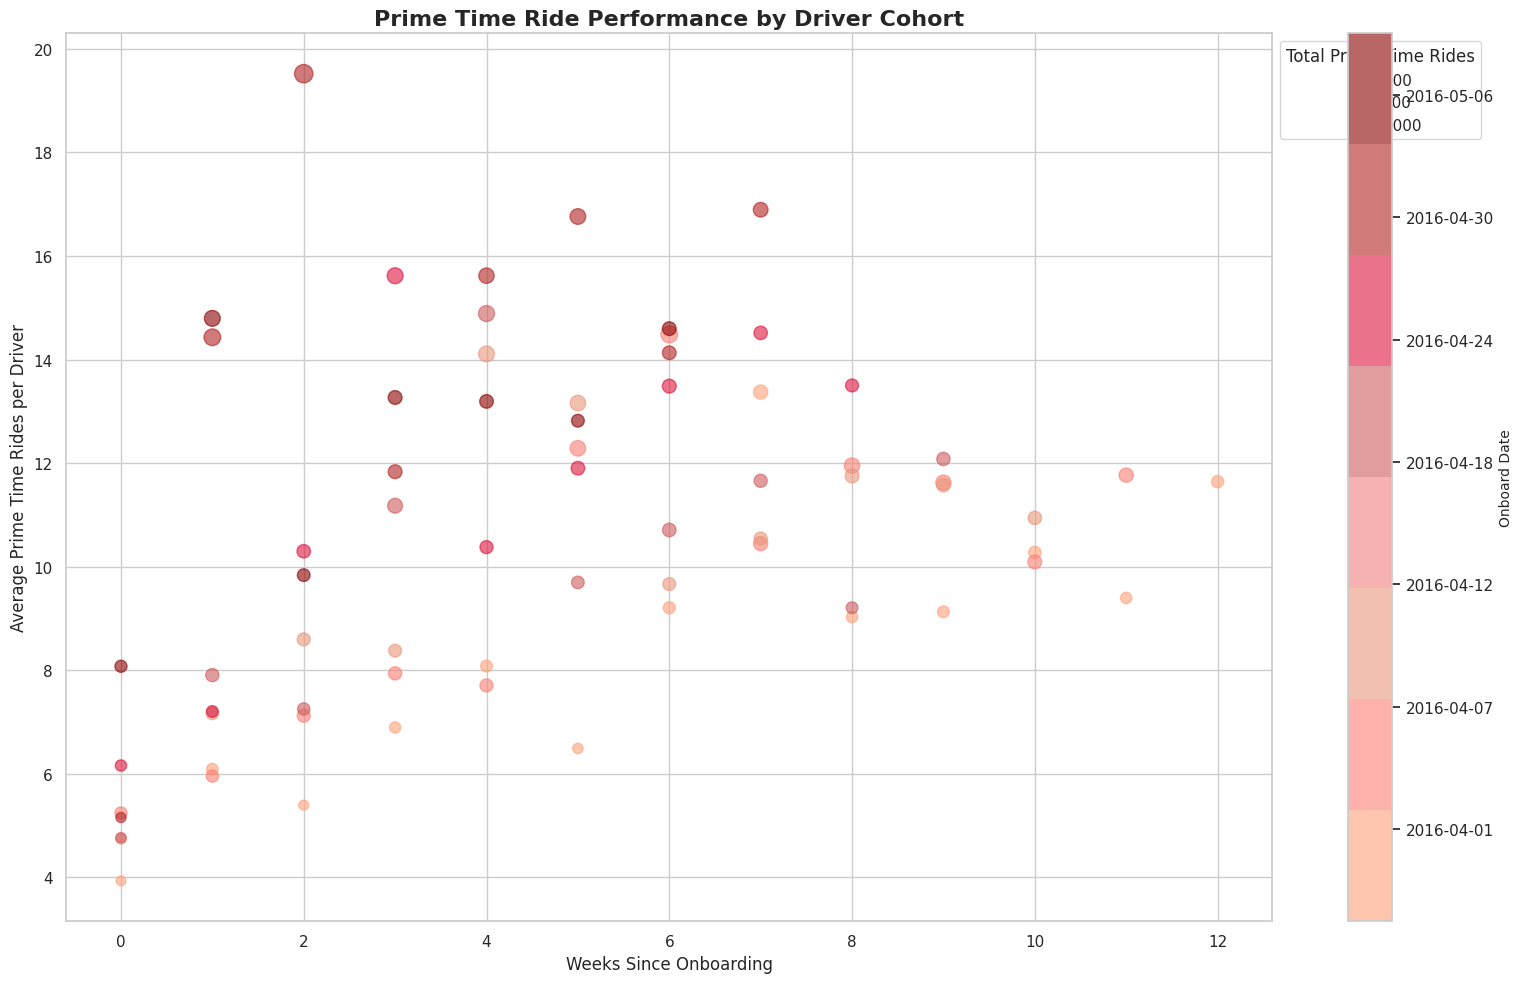

In [66]:
from matplotlib.colors import LinearSegmentedColormap
weekly_avg_prime_time_rides['weeks_since_onboarding'] = (weekly_avg_prime_time_rides['requested_week'] - weekly_avg_prime_time_rides['onboard_week']).dt.days // 7
weekly_avg_prime_time_rides['total_prime_time_rides'] = weekly_avg_prime_time_rides['prime_time_rides']
colors = ['#FFA07A', '#FA8072', '#E9967A', '#F08080', '#CD5C5C', '#DC143C', '#B22222', '#8B0000']
n_bins = 8
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)
plt.figure(figsize=(16, 10))
scatter = plt.scatter(weekly_avg_prime_time_rides['weeks_since_onboarding'],
                      weekly_avg_prime_time_rides['avg_prime_time_rides'],
                      s=weekly_avg_prime_time_rides['total_prime_time_rides'] / 10,  # Adjust the divisor to scale bubble sizes
                      c=weekly_avg_prime_time_rides['onboard_week'].astype(int),
                      cmap=cmap,
                      alpha=0.6)

plt.xlabel('Weeks Since Onboarding', fontsize=12)
plt.ylabel('Average Prime Time Rides per Driver', fontsize=12)
plt.title('Prime Time Ride Performance by Driver Cohort', fontsize=16, fontweight='bold')

cbar = plt.colorbar(scatter)
cbar.set_label('Onboard Date', fontsize=10)
cbar.ax.set_yticklabels([pd.to_datetime(tick).strftime('%Y-%m-%d') for tick in cbar.get_ticks()])
sizes = [100, 500, 1000]
labels = ['100', '500', '1000']
legend_elements = [plt.scatter([], [], s=size/10, c='gray', alpha=0.4, label=label) for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, title='Total Prime Time Rides', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [67]:
table['driver_onboard_date'] = pd.to_datetime(table['driver_onboard_date'])
table['requested_at'] = pd.to_datetime(table['requested_at'])
churn_threshold_date = table['requested_at'].max() - pd.Timedelta(weeks=4)
driver_last_ride = table.groupby('driver_id')['requested_at'].max().reset_index()
driver_last_ride['is_churned'] = np.where(driver_last_ride['requested_at'] < churn_threshold_date, 1, 0)
lyft_data = table.merge(driver_last_ride[['driver_id', 'is_churned']], on='driver_id', how='left')
driver_features = lyft_data.groupby('driver_id').agg(
    total_rides=('ride_id', 'count'),
    avg_ride_distance=('ride_distance (miles)', 'mean'),
    avg_ride_duration=('ride_duration (minutes)', 'mean'),
    avg_ride_prime_time=('ride_prime_time (percentage)', 'mean'),
    avg_cost_prime_time=('cost w/ prime time', 'mean'),
    total_lyft_profit=('lyft profit', 'sum'),
    avg_request_to_accept=('duration_request_to_accept', 'mean'),
    avg_accept_to_arrive=('duration_accept_to_arrive', 'mean')
).reset_index()
driver_features = driver_features.merge(driver_last_ride[['driver_id', 'is_churned']], on='driver_id', how='left')
correlation_matrix = driver_features.select_dtypes(include=[np.number]).corr()['is_churned'].sort_values(ascending=False)
print("Correlation with churn:\n", correlation_matrix)


Correlation with churn:
 is_churned               1.000000
avg_accept_to_arrive     0.060682
avg_request_to_accept   -0.020643
avg_ride_distance       -0.052168
avg_ride_duration       -0.112194
avg_cost_prime_time     -0.127466
avg_ride_prime_time     -0.180111
total_lyft_profit       -0.444307
total_rides             -0.444680
Name: is_churned, dtype: float64


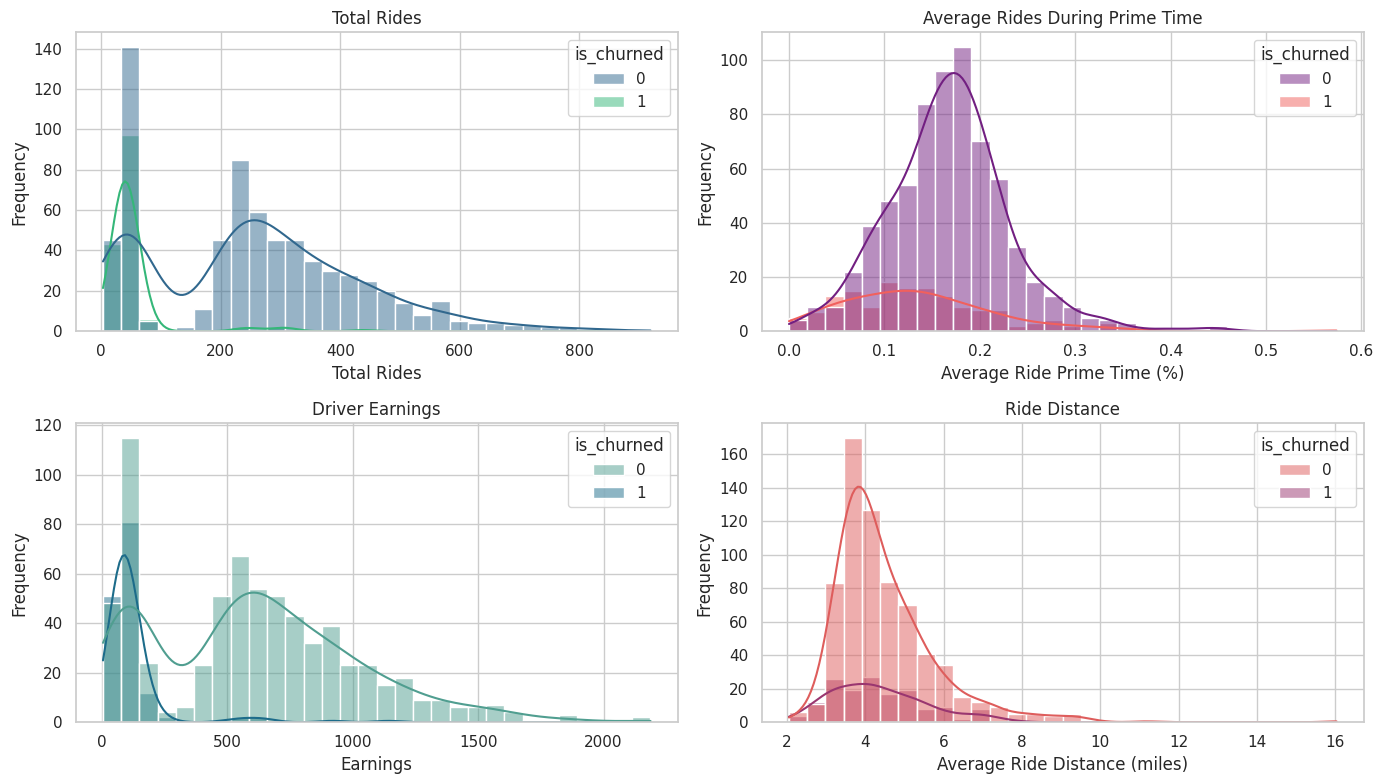

In [68]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

plt.subplot(2, 2, 1)
sns.histplot(data=driver_features, x='total_rides', hue='is_churned', bins=30, kde=True, palette="viridis")
plt.title("Total Rides")
plt.xlabel("Total Rides")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(data=driver_features, x='avg_ride_prime_time', hue='is_churned', bins=30, kde=True, palette="magma")
plt.title("Average Rides During Prime Time")
plt.xlabel("Average Ride Prime Time (%)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(data=driver_features, x='total_lyft_profit', hue='is_churned', bins=30, kde=True, palette="crest")
plt.title("Driver Earnings")
plt.xlabel("Earnings")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(data=driver_features, x='avg_ride_distance', hue='is_churned', bins=30, kde=True, palette="flare")
plt.title("Ride Distance")
plt.xlabel("Average Ride Distance (miles)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()